## Setup Github

Import the github repository and move it into the local directory (also remove the defult samples directoy if it exists)

In [1]:
from getpass import getpass
import os


if not os.path.isdir(".git"):
    user = "Boyne272"
    password = getpass('github password')
    os.environ['GITHUB_AUTH'] = user + ':' + password

    # clone the repo
    !git clone https://$GITHUB_AUTH@github.com/msc-acse/acse-8-miniproject-softmax.git repo

    # move the repo up one
    !mv repo/* .
    !mv repo/.git .

    # delete un needed stuff
    !rm -r repo
    !rm -r sample_data/

github password··········
Cloning into 'repo'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 725 (delta 22), reused 33 (delta 11), pack-reused 678
Receiving objects: 100% (725/725), 204.95 MiB | 40.47 MiB/s, done.
Resolving deltas: 100% (389/389), done.
Checking out files: 100% (108/108), done.


### Github Commands

In [2]:
!git checkout richard
# !git reset --hard
!git pull origin richard
!ls -l
!git log -1

D	.gitignore
Branch 'richard' set up to track remote branch 'richard' from 'origin'.
Switched to a new branch 'richard'
From https://github.com/msc-acse/acse-8-miniproject-softmax
 * branch            richard    -> FETCH_HEAD
Already up to date.
total 32
drwxr-xr-x  2 root root  4096 May 23 17:33 data
drwxr-xr-x 13 root root  4096 May 23 17:33 models
-rw-r--r--  1 root root   771 May 23 17:33 README.md
drwxr-xr-x  2 root root  4096 May 23 17:33 spec
-rw-r--r--  1 root root 10208 May 23 17:33 tools.py
drwxr-xr-x  3 root root  4096 May 23 17:33 training
commit 3f0369b68a7f2437e6943031276a104cc8f59bd4 (HEAD -> richard, origin/richard)
Author: Boyne272 <boynerichard@yahoo.co.uk>
Date:   Thu May 23 11:49:24 2019 +0100

    added my version of a larger nural network


## Setup Imports

Ipython imports and functions

In [3]:
# ipython setup
!pip install pycm livelossplot
%pylab inline
%load_ext autoreload
%autoreload 2

     |████████████████████████████████| 51kB 1.3MB/s 
     |████████████████████████████████| 491kB 5.4MB/s 
     |████████████████████████████████| 215kB 63.9MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 4.5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 4.5.3 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1
Populating the interactive namespace from numpy and matplotlib


Module imports

In [0]:
# imports
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from torchvision.transforms import Compose, ToTensor, Normalize, RandomRotation, RandomCrop, ToPILImage, Pad

from livelossplot import PlotLosses
from pycm import *

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# imports from github
from tools import *

Check runtime device

In [5]:
# check running device
device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Cuda installed! Running on GPU!


Mount google drive if wanted

In [6]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


## Load Data

In [0]:
train_feat = np.load("/content/data/kmnist-train-imgs.npy")
train_targ = np.load("/content/data/kmnist-train-labels.npy")
test_feat = np.load("/content/data/kmnist-test-imgs.npy")

In [8]:
# check what the data looks like
for data, data_name in zip([train_targ, test_feat, train_feat], 
                           ["train_targ", "test_feat", "train_feat"]):
    
    print(data_name)
    
    for name, code in zip(["shape", "mean", "std", "max", "min", "type", "cuda"],
                          ["data.shape", "data.mean()", "data.std()", 
                           "data.max()", "data.min()", "data.dtype"]):
        try:
            exec("print('\t', name, '\t:\t', " + code + ")")
        except:
            print("\t", name, "\t:\t undefined")

train_targ
	 shape 	:	 (60000,)
	 mean 	:	 4.5
	 std 	:	 2.8722813232690143
	 max 	:	 9
	 min 	:	 0
	 type 	:	 uint8
test_feat
	 shape 	:	 (10000, 28, 28)
	 mean 	:	 47.06204145408163
	 std 	:	 87.1110021912918
	 max 	:	 255
	 min 	:	 0
	 type 	:	 uint8
train_feat
	 shape 	:	 (60000, 28, 28)
	 mean 	:	 48.89934757653061
	 std 	:	 88.82742173832395
	 max 	:	 255
	 min 	:	 0
	 type 	:	 uint8


Now set our parameters

In [0]:
# Other Hyperparameters
Seed = 42
Learning_Rate = 1e-2
Momentum = 0.5
Batch_Size = 64
Test_Batch_Size = 1000
Number_of_Epochs = 30

In [0]:
# AlexNet_half (Dropout)
class AlexNet_half_drop_batch(nn.Module):
    """
    Neural Network inspired on Alexnet, with a reduced number of parameters (989410).
    """

    def __init__(self, bias=True):
        "setup the neural network"
        
        # initalise
        super(AlexNet_half_drop_batch, self).__init__()

        # create the activation function
        act = nn.ReLU()
        
        self.convolutional = nn.Sequential(
            nn.Conv2d(1, 24, padding=1, kernel_size=4, stride=1, bias=bias), act,
            nn.BatchNorm2d(24),
            nn.MaxPool2d(kernel_size=1, stride=1), act,
            nn.Conv2d(24, 64, padding=2, kernel_size=5, stride=1, bias=bias), act,
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=3, stride=2), act,
            nn.Conv2d(64, 96, padding=2, kernel_size=5, stride=1, bias=bias), act,
            nn.Conv2d(96, 96, padding=1, kernel_size=3, stride=1, bias=bias), act,
            nn.Conv2d(96, 64, padding=1, kernel_size=3, stride=1, bias=bias), act,
            nn.MaxPool2d(kernel_size=3, stride=2), act)
        
        self.full_connected = nn.Sequential(
            nn.Linear(2304, 256, bias=bias), act,
            nn.Dropout(),
            nn.Linear(256, 256, bias=bias), act,
            nn.Dropout(),
            nn.Linear(256, 10, bias=bias)
        )

    def flatten(self, T):
        "flatten the image for the fully connected layers"
        return T.view(-1, T.size(1)*T.size(2)*T.size(3))
        
        
    def forward(self, x):
        "Pass through the neural network"
        x = self.convolutional(x)
        x = self.flatten(x)
        x = self.full_connected(x)
        return x

## Data pre-processing

Define the data set creation function with the transformations.

In [11]:
# do the split
n_folds = 10
shuffler =  StratifiedKFold(n_splits=n_folds, random_state=42, shuffle=True)
shuffler = shuffler.split(train_feat, train_targ)

# get the indices
indices = np.array(list(shuffler))
print(indices.shape)
print([i.shape for i in indices.flatten()])

(10, 2)
[(54000,), (6000,), (54000,), (6000,), (54000,), (6000,), (54000,), (6000,), (54000,), (6000,), (54000,), (6000,), (54000,), (6000,), (54000,), (6000,), (54000,), (6000,), (54000,), (6000,)]


In [0]:
def create_dataset_mod(t_feat, v_feat, t_targ, v_targ):
    
    # make trgets torch type and shape
    t_targ = torch.from_numpy(t_targ)
    t_targ = t_targ.long()
    v_targ = torch.from_numpy(v_targ)
    v_targ = v_targ.long()
    # (features are changed in the transofrmations)

    # find mean and std
    mean, std = np.mean(t_feat)/255., np.std(t_feat)/255.
    print("avg:", mean, "std:", std)
    
    # includes data augmentation
    train_transform = Compose([
        ToPILImage(),
        RandomCrop(24),
        Pad(2),
        RandomRotation(15),
        ToTensor(),
        Normalize(mean=[mean], std=[std]),
        ])

    # only want to normalize here
    validation_test_transform = Compose([
        ToTensor(),
        Normalize(mean=[mean], std=[std]),
        ])

    
    # create the custom datasets
    train_set = CustomImageTensorDataset(t_feat, t_targ, transform=train_transform)
    valid_set = CustomImageTensorDataset(v_feat, v_targ, transform=validation_test_transform)

    return train_set, valid_set

## Symbol Inflation


In [0]:
def image_inflation(t_feat, t_targ, failed_indices=[], no_increase=10, no_random=np.ones(10)):
    # find the features and targets we want to duplicate
    
    to_dupe = []
    
    
    # for every symbol class
    for sym, fails in enumerate(failed_indices):
      
      # adding chance of sampling any number with this value
      fails = fails + [-1]*no_random[sym]
      
      dupe = np.random.choice(fails, no_increase)
    
      # every id with this symbol
      all_ids = np.where(t_targ == sym)[0]
      
      count = 0  
    
      for n, i in enumerate(dupe):
        if i == -1:
          count += 1
          dupe[n] = np.random.choice(all_ids, 1)
      
      print("number random:", count)
    
      to_dupe.append(dupe)
          
    to_dupe = np.array(to_dupe).flatten()
    dup_feat = t_feat[to_dupe]
    dup_targ = t_targ[to_dupe]
    
    # add to the data sets
    t_feat = np.concatenate([t_feat, dup_feat], axis=0)
    t_targ = np.concatenate([t_targ, dup_targ], axis=0)

    return t_feat, t_targ

In [0]:

def find_failed_indexs(ypred, yact):
  failed = [[],[],[],[],[],[],[],[],[],[]]
  for i in range(len(yact)):
    if (yact[i]!=ypred[i]):
      failed[yact[i]].append(i)
  return failed
    

In [0]:
# test this
t_index, v_index = indices[0]
t_feat, t_targ = train_feat[t_index], train_targ[t_index]
v_feat, v_targ = train_feat[v_index], train_targ[v_index]



In [16]:
model = torch.load("/content/models/AlexNet_DropAugBatch_Fixed/WedMorn_150.pth")

wrapper2 = train_wrapper(model["model"], None, None, None, device=device)
wrapper2.transform = model["transform"]


ypred = wrapper2.evaluate(t_feat, False)
print(ypred.shape)

No transform found, test data must be normalised manually
(54000,)


# Image Inflation

In [17]:
failed = find_failed_indexs(ypred, t_targ)
failed_nos = [len(f) for f in failed]
print(failed_nos)

[4, 6, 8, 1, 1, 4, 2, 3, 4, 4]


In [18]:
print("pre-inflation:", t_feat.shape, t_targ.shape)
print(np.unique(t_targ, return_counts=True)[1])

t_feat_inflated, t_targ_inflated = image_inflation(t_feat, t_targ, failed_indices=failed, no_increase=200, no_random=[8 - f for f in failed_nos])
print("post-inflation:", t_feat_inflated.shape, t_targ_inflated.shape)
print(np.unique(t_targ_inflated, return_counts=True)[1])


pre-inflation: (54000, 28, 28) (54000,)
[5400 5400 5400 5400 5400 5400 5400 5400 5400 5400]
number random: 107
number random: 52
number random: 0
number random: 173
number random: 181
number random: 92
number random: 148
number random: 134
number random: 100
number random: 101
post-inflation: (56000, 28, 28) (56000,)
[5600 5600 5600 5600 5600 5600 5600 5600 5600 5600]


In [19]:
t_set, v_set = create_dataset_mod(t_feat_inflated, v_feat, t_targ_inflated, v_targ)

train_loader, validate_loader = [DataLoader(t_set, batch_size=Batch_Size, shuffle=True),
                                 DataLoader(v_set, batch_size=Test_Batch_Size, shuffle=False)]
    

avg: 0.19203564917038246 std: 0.3484851834388723


## TRAIN MODEL

In [24]:
# setup
set_seed(Seed)
model = AlexNet_half_drop_batch().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=Learning_Rate, momentum=Momentum)
criterion = nn.CrossEntropyLoss()

wrapper = train_wrapper(model, optimizer, train_loader, validate_loader, 
                        criterion=criterion, device=device)
wrapper.num_model_params()

Number of model Parameters:  989586


989586

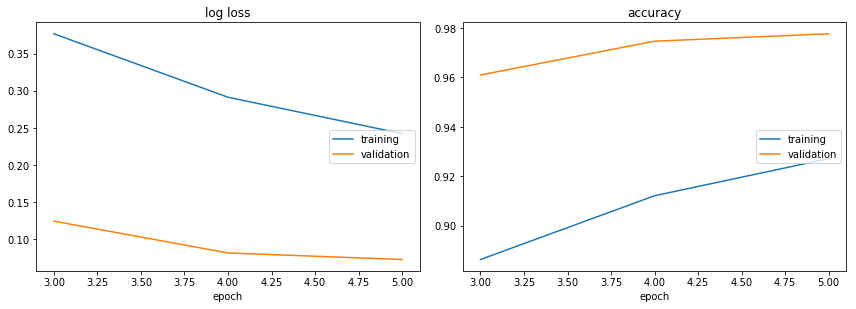

log loss:
training   (min:    0.242, max:    1.574, cur:    0.242)
validation (min:    0.073, max:    0.495, cur:    0.073)

accuracy:
training   (min:    0.436, max:    0.927, cur:    0.927)
validation (min:    0.836, max:    0.978, cur:    0.978)
Training Finished
saved to /content/gdrive/My Drive/models/DAB_basic_200_adapt_inflation_5.pth


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet_half_drop_batch. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [25]:
wrapper.train_model(5)
wrapper.save_model("DAB_basic_200_adapt_inflation_5.pth")

In [27]:
# wrapper.train_model(45)
wrapper.save_model("DAB_basic_200_adapt_inflation_50.pth")

saved to /content/gdrive/My Drive/models/DAB_basic_200_adapt_inflation_50.pth


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet_half_drop_batch. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


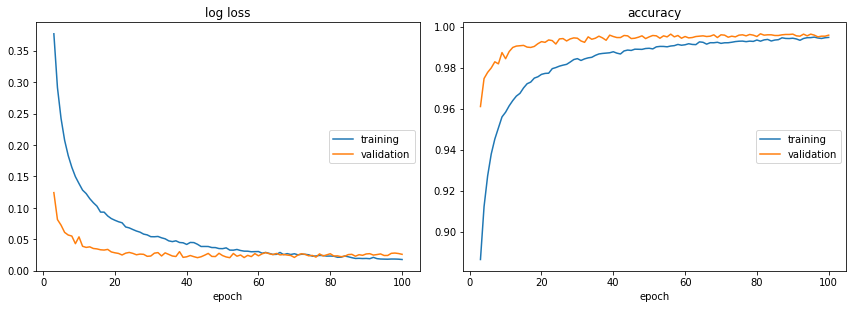

log loss:
training   (min:    0.018, max:    1.574, cur:    0.018)
validation (min:    0.021, max:    0.495, cur:    0.026)

accuracy:
training   (min:    0.436, max:    0.995, cur:    0.995)
validation (min:    0.836, max:    0.997, cur:    0.996)
Training Finished
saved to /content/gdrive/My Drive/models/DAB_basic_200_adapt_inflation_100.pth


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type AlexNet_half_drop_batch. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [28]:
wrapper.train_model(50)
wrapper.save_model("DAB_basic_200_adapt_inflation_100.pth")

In [29]:
pred = wrapper.evaluate(test_feat, False)
save_csv(pred, "super_dodge_padded", "/content/gdrive/My Drive/models/")

successfully saved in /content/gdrive/My Drive/models/super_dodge_padded.csv


In [0]:
wrapper.train_model(50)
wrapper.save_model("DAB_basic_200_adapt_inflation_150.pth")